In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [79]:
cars=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
cars.info()
cars.isnull()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [80]:
#dropping name of cars as it will not have significant effect on prices
cars.drop(['name'],axis=1,inplace=True)


In [81]:
cars.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [82]:
#dividing numerical and categorical data
cars_num=cars.select_dtypes(include=['int64','int32','float64'])


In [83]:
cars_cat=cars.select_dtypes(object)
cars_cat.head()

,fuel,seller_type,transmission,owner
0,Petrol,Individual,Manual,First Owner
1,Petrol,Individual,Manual,First Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,First Owner
4,Diesel,Individual,Manual,Second Owner


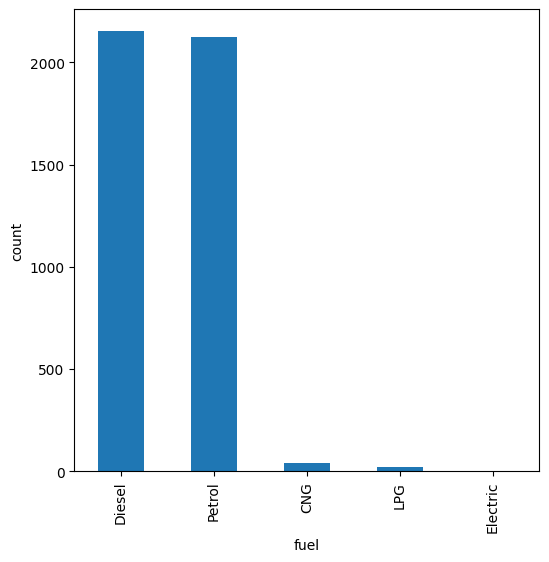

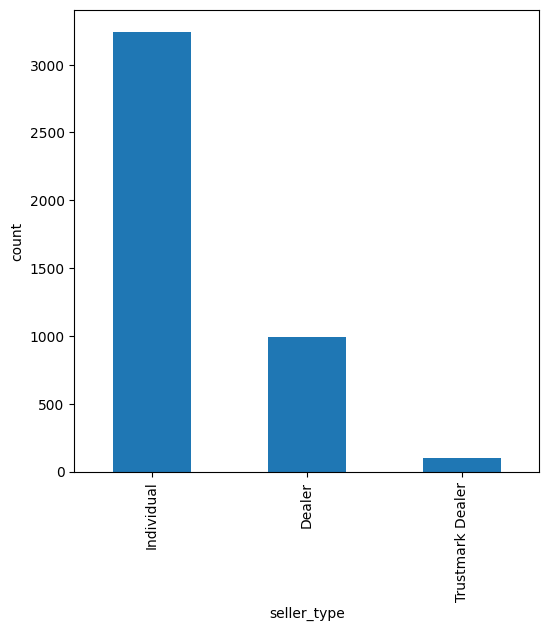

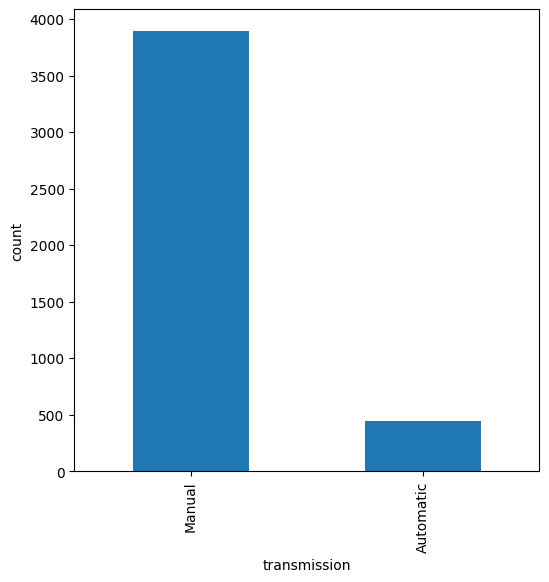

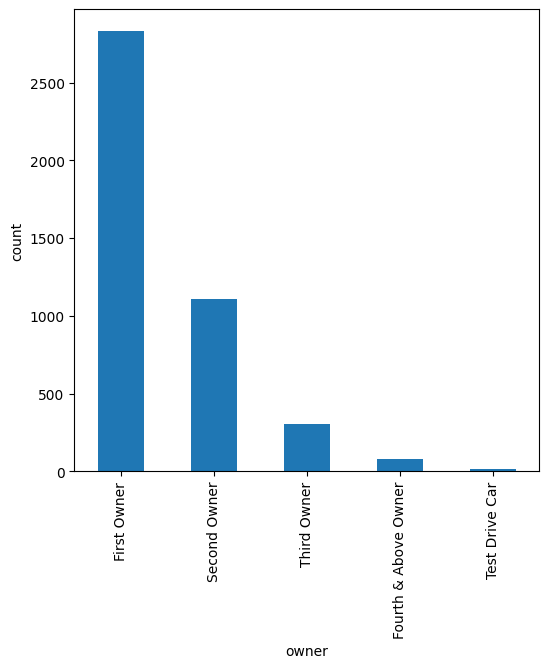

In [84]:
#making some graphs to get insights for categorical data
for c in cars_cat:
    plt.figure(figsize=(6,6))
    plt.xlabel(c)
    plt.ylabel('count')
    cars_cat[c].value_counts().plot(kind = 'bar')
    plt.show()

In [85]:
# categorical data handling:- using label encoding to convert categorical data into required form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cars_cat:
    cars_cat[col]=le.fit_transform(cars_cat[col])
cars_cat.head()


,fuel,seller_type,transmission,owner
0,4,1,1,0
1,4,1,1,0
2,1,1,1,0
3,4,1,1,0
4,1,1,1,2


In [86]:

# now lets seee if there are null values in numerical data
cars_num.isnull()
#no null value seen



,year,selling_price,km_driven
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
4335,False,False,False
4336,False,False,False
4337,False,False,False
4338,False,False,False


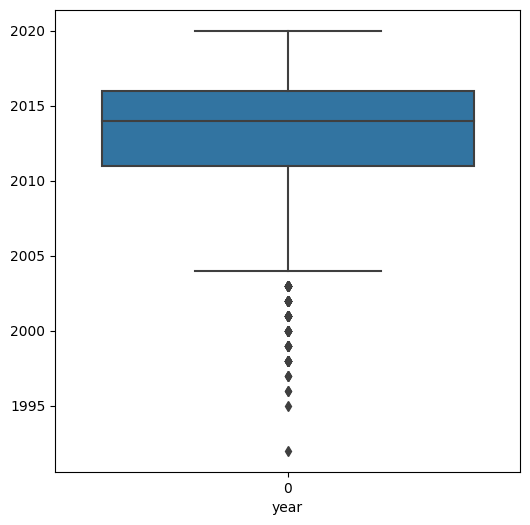

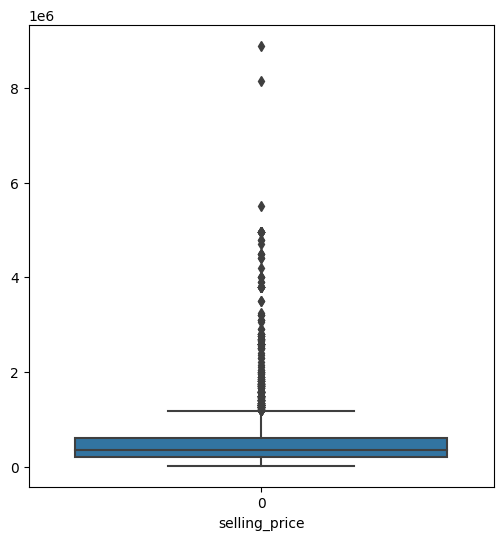

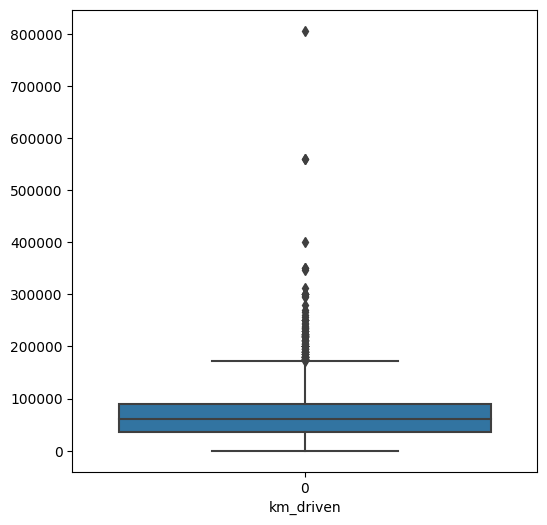

In [87]:
# HANDLING OUTLIERS:- let's see for if some outliers are there in data or not by using boxplot
for col in cars_num:
    plt.figure(figsize=(6,6))
    plt.xlabel(col)
    sea.boxplot(cars_num[col])
    plt.show()




# in first graph of year we can see some outliers we will remove them taking threshold as 2004
#in second that is selling price ouliers are bit concentrated in aline that is because some cars might have higher price of average due to their features
#in third that is km_driven ouliers are also concentrated here in a line so they removing them can have significant effect but lets remove opuliers from 30000 onwards



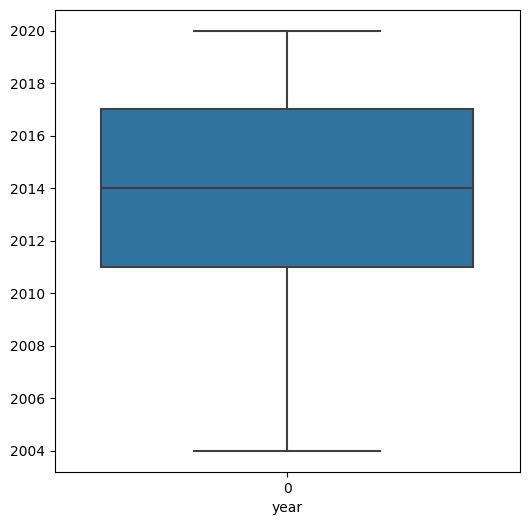

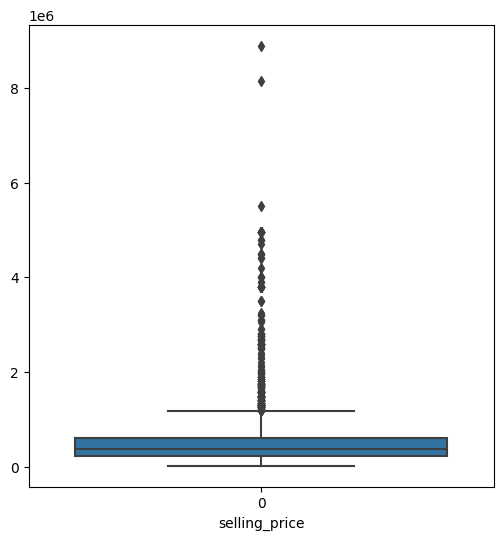

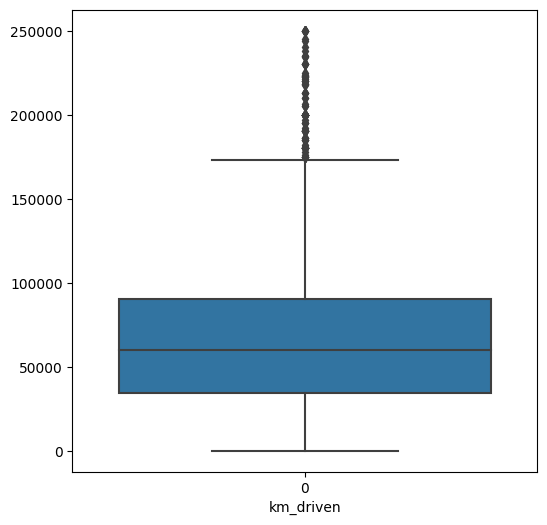

In [89]:
for col in cars_num:
    if col=='km_driven':
        cars_num.drop(cars_num[cars_num[col] > 250000].index, inplace=True)
    elif col=='year':
        cars_num.drop(cars_num[cars_num[col] <2004].index, inplace=True)
    else:
        continue
cars_num.head()
for col in cars_num:
    plt.figure(figsize=(6,6))
    plt.xlabel(col)
    sea.boxplot(cars_num[col])
    plt.show()

In [90]:
cars_num.head()

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000


year
-0.4701673652750901


/tmp/ipykernel_33/2577459405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(cars_num[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


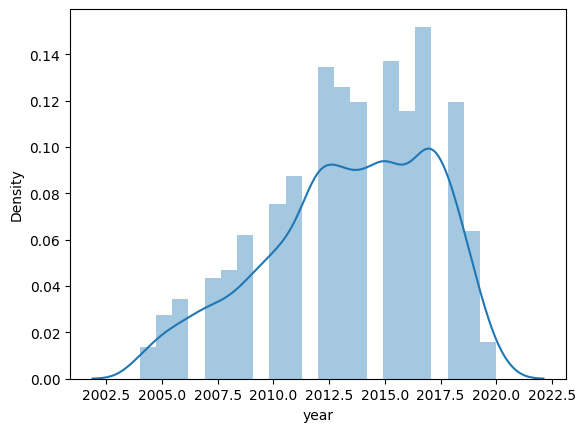

selling_price
4.876985568044226


/tmp/ipykernel_33/2577459405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(cars_num[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


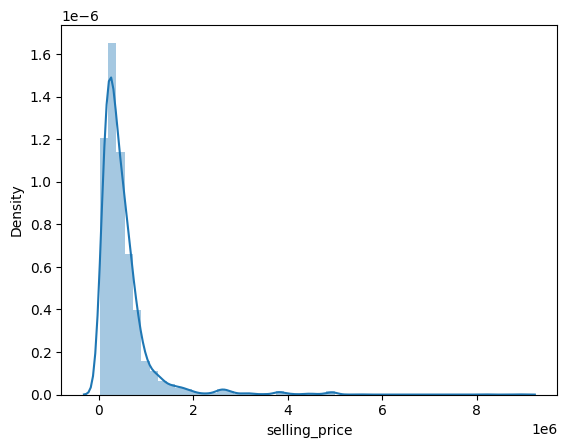

km_driven
1.0273485869209724


/tmp/ipykernel_33/2577459405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(cars_num[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


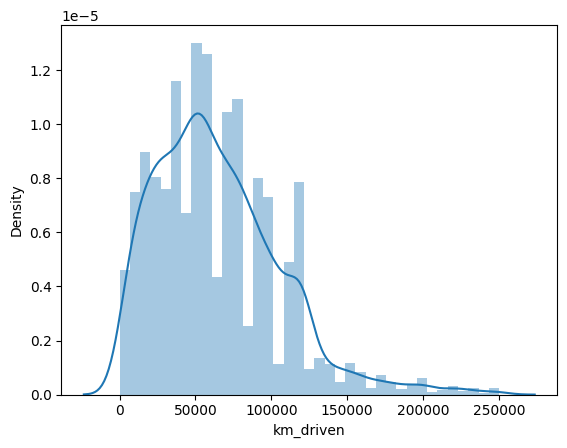

In [91]:
#SKEW HANDLING:- DISTRIBUTION GRAPH
from scipy.stats import skew
for col in cars_num:
    print(col)
    print(skew(cars_num[col]))
    plt.figure()
    sea.distplot(cars_num[col])
    plt.show()

In [92]:
#in year skew is -0.0.4701673652,less
#in selling price it is 4.876985568044226,very high 
#in km_driven it is 1.0273485869209724,high

-0.07881667024111531


/tmp/ipykernel_33/2308201653.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(cars_num['selling_price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


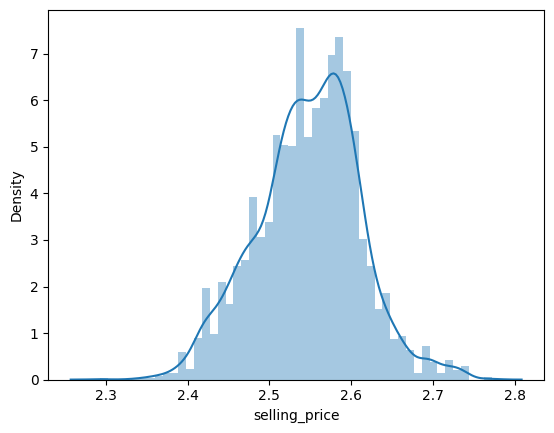

In [95]:
#for removing skewness of selling price
import numpy as np
cars_num['selling_price'] = np.log(cars_num['selling_price'])
print(skew(cars_num['selling_price']))
plt.figure()
sea.distplot(cars_num['selling_price'])
plt.show()

-0.0008755881675076017


/tmp/ipykernel_33/3305028614.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(cars_num['km_driven'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


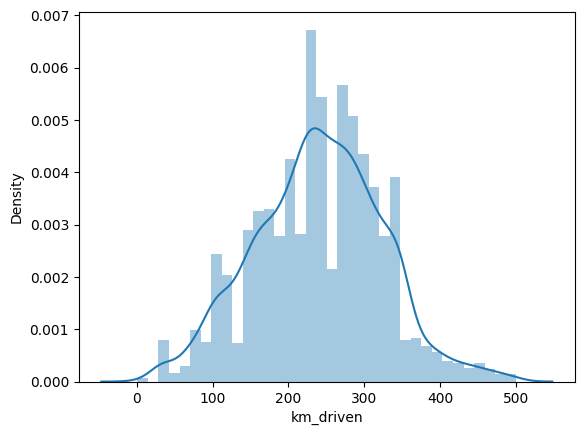

In [96]:

#for removing skewness of selling price
import numpy as np
cars_num['km_driven'] = np.sqrt(cars_num['km_driven'])
print(skew(cars_num['km_driven']))
plt.figure()
sea.distplot(cars_num['km_driven'])
plt.show()


-0.47250157091020933


/tmp/ipykernel_33/2950253690.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(cars_num['year'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


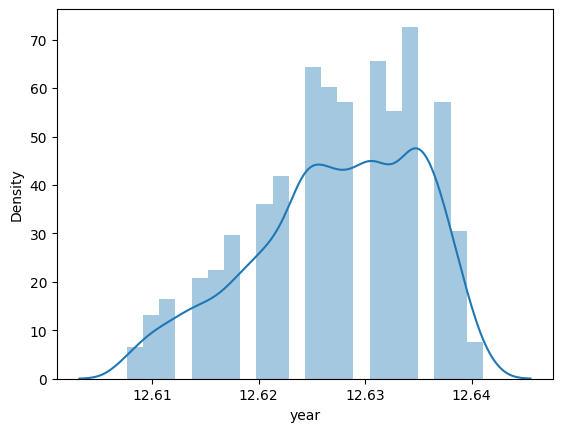

In [97]:
#for removing skewness of selling price
import numpy as np
cars_num['year'] = np.cbrt(cars_num['year'])
print(skew(cars_num['year']))
plt.figure()
sea.distplot(cars_num['year'])
plt.show()

In [100]:
#lets's first merge the data of cars_num and cars_cat
cars_new=pd.concat([cars_num,cars_cat],axis=1)
cars_new.head()



,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,12.613892,2.398086,264.575131,4,1,1,0
1,12.613892,2.469203,223.606798,4,1,1,0
2,12.624359,2.588116,316.227766,1,1,1,0
3,12.634808,2.520050,214.476106,4,1,1,0
4,12.628540,2.566256,375.499667,1,1,1,2


In [104]:
#scaling data with standard scalar
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for col in cars_new:
    cars_new[col]=ss.fit_transform(cars_new[[col]])
cars_new.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,-1.707228,-2.353327,0.294359,1.014993,0.448192,0.339276,-0.665079
1,-1.707228,-1.233573,-0.191797,1.014993,0.448192,0.339276,-0.665079
2,-0.375648,0.638741,0.907301,-0.974051,0.448192,0.339276,-0.665079
3,0.953728,-0.432980,-0.300147,1.014993,0.448192,0.339276,-0.665079
4,0.156367,0.294553,1.610658,-0.974051,0.448192,0.339276,0.956519


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

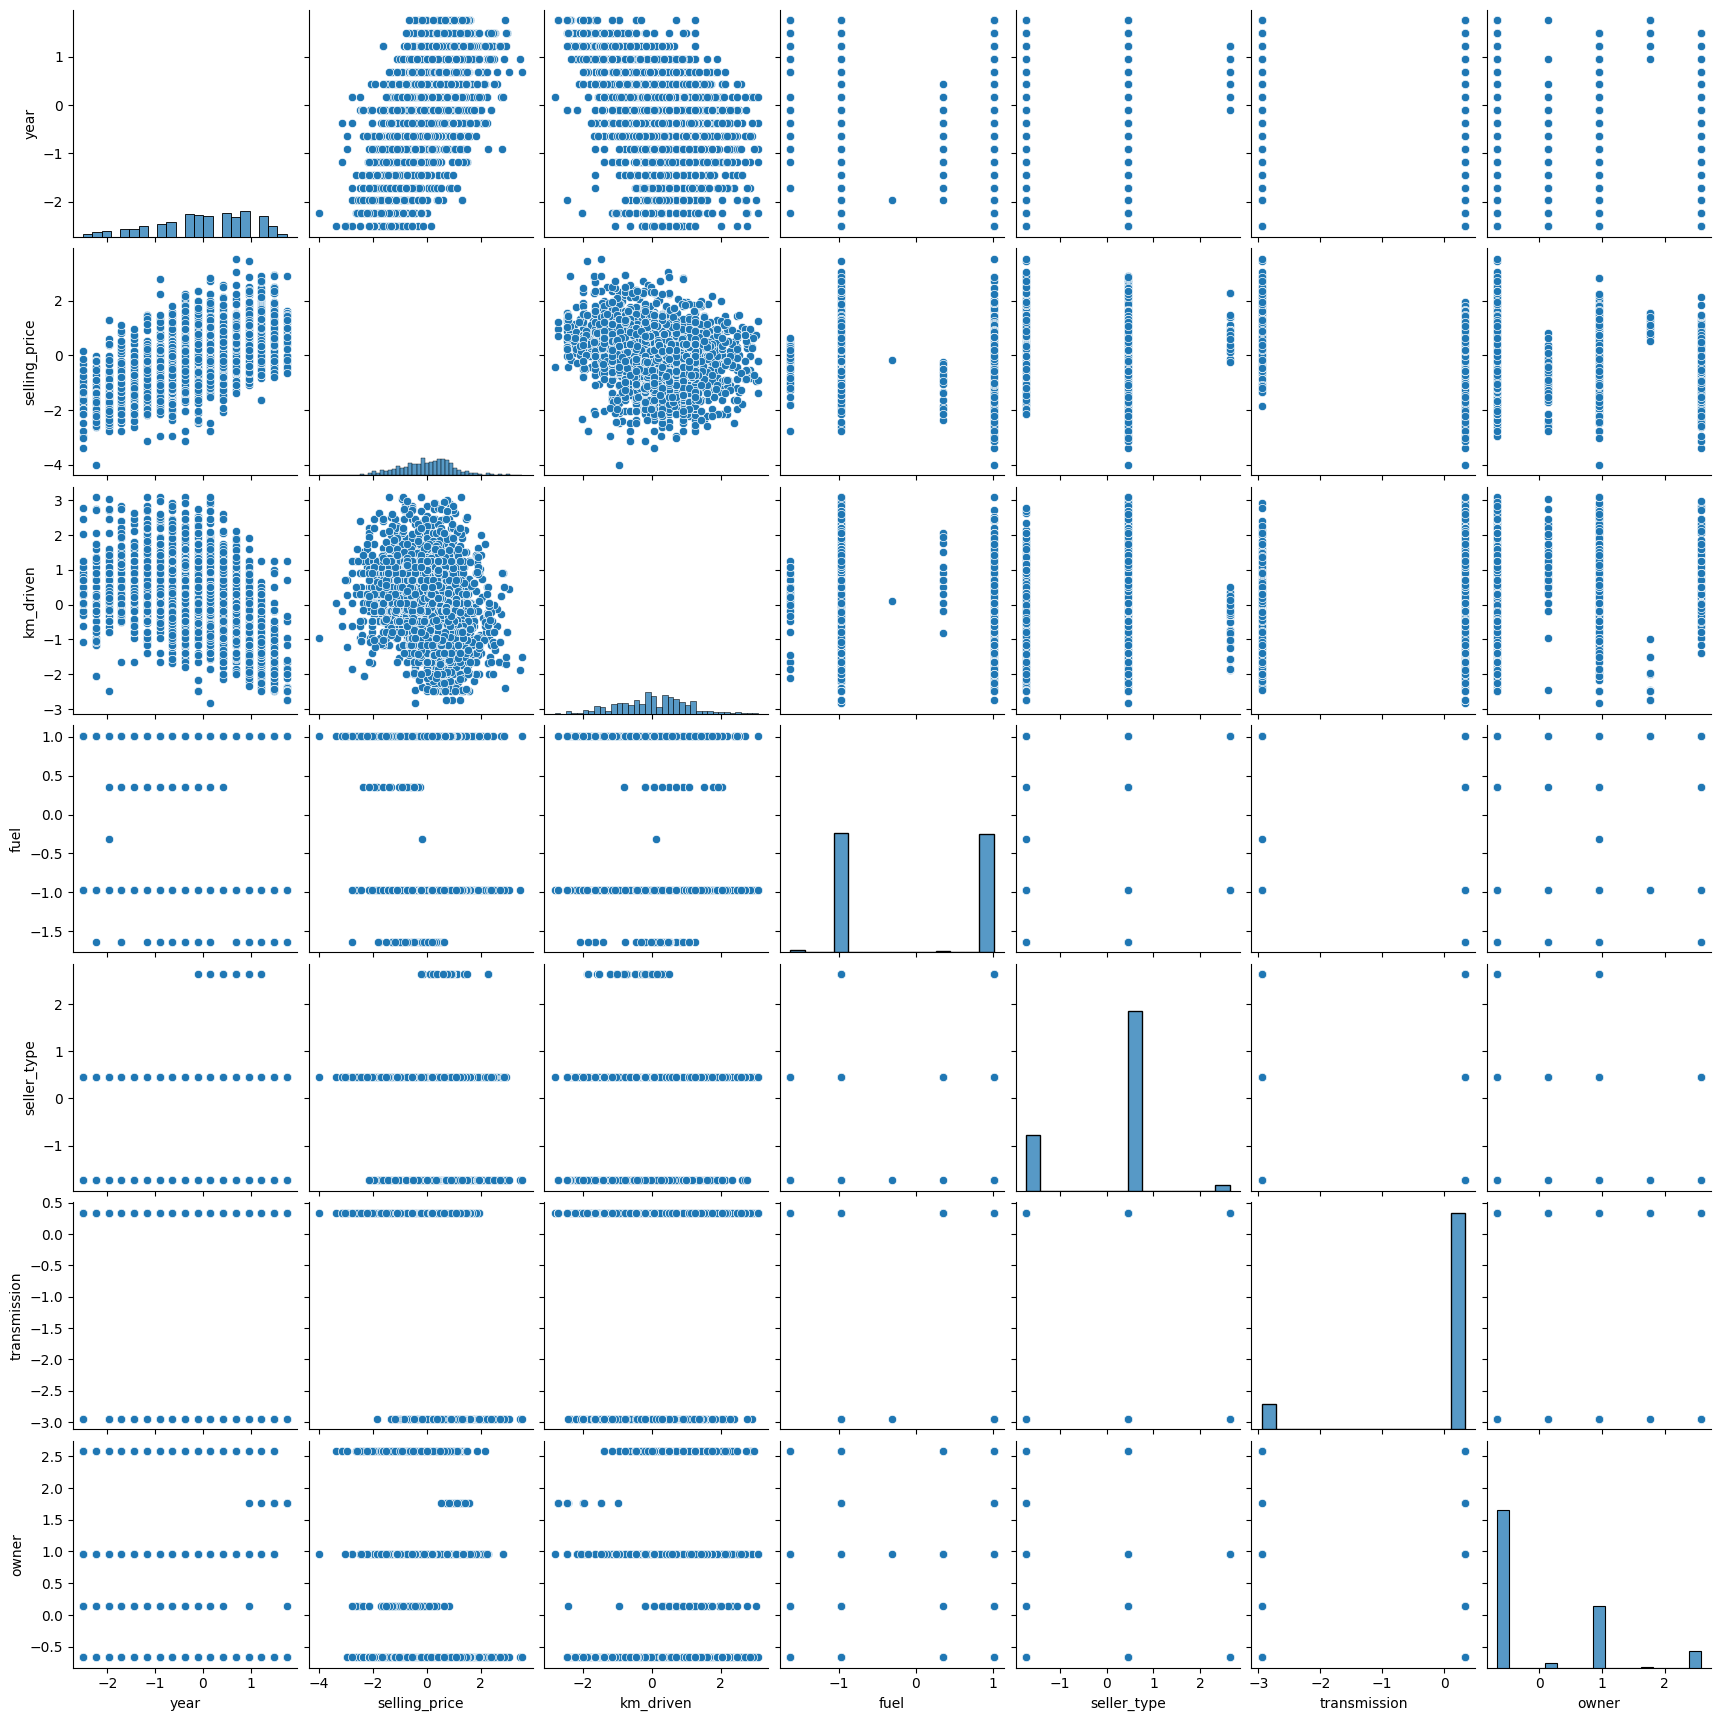

In [108]:
# lets print all graphd for understanding relationships here
num_col=['year','selling_price','km_driven','fuel','seller_type','transmission','owner']
sea.pairplot(cars_new[num_col])
plt.show()



In [119]:
y = cars_new['selling_price']
X = cars_new.drop('selling_price', axis=1) 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)




ValueError: Expected 2D array, got 1D array instead:
array=[-0.89142271  1.17338731 -0.43297985 ... -0.7509173   0.73318289
 -1.05050477].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

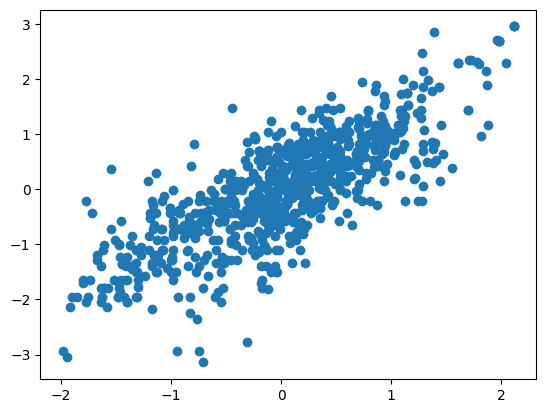

In [126]:
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))

# Reshape imputed target variables back to 1D arrays
y_train_imputed = y_train_imputed.ravel()
y_test_imputed = y_test_imputed.ravel()

# making linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_imputed,y_train_imputed)
import matplotlib.pyplot as plt
pre=model.predict(X_test_imputed)
plt.scatter(pre,y_test_imputed)

In [128]:
r_score = model.score(X_test_imputed, y_test_imputed)
print("R-squared (R2) Score:", r_score)
coefficients = model.coef_

# Print the coefficients
print("Regression Coefficients:")
print(coefficients)

R-squared (R2) Score: 0.6428389187072377
Regression Coefficients:
[ 0.58921616 -0.02395215 -0.29818708 -0.04088888 -0.28379877 -0.03258001]
